In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
data = pd.read_csv("RFLFSODataFull.csv")

In [3]:
data.head()

,FSO_Att,RFL_Att,AbsoluteHumidity,AbsoluteHumidityMax,AbsoluteHumidityMin,Distance,Frequency,Particulate,ParticulateMax,ParticulateMin,...,TemperatureMax,TemperatureMin,Time,Visibility,VisibilityMax,VisibilityMin,WindDirection,WindSpeed,WindSpeedMax,WindSpeedMin
0,7.913289,6.927868,17.595709,17.615907,17.340148,2115.338398,83500000000,0.0,0.0,0.0,...,26.603030,24.680849,9,65884.51846,72336.362233,65617.543754,88.755450,3.057066,6.863808,3.007939
1,7.451176,4.412096,17.549693,17.572415,17.299439,2113.999257,73500000000,0.0,0.0,0.0,...,26.377164,24.313108,9,64963.41092,68753.386153,60379.327485,99.790057,2.727910,6.468903,2.537393
2,7.072747,6.268740,17.290230,17.644014,16.037894,2118.689047,83500000000,0.0,0.0,0.0,...,27.670822,23.150277,10,54794.28107,54821.773817,50850.155963,65.730085,1.674810,2.826916,1.640809
3,6.949288,4.317853,16.820880,17.066776,15.895622,2114.632339,73500000000,0.0,0.0,0.0,...,26.522100,23.174815,10,50205.64159,52519.927530,45374.510898,88.127497,0.962068,2.780643,0.886951
4,7.361052,6.114514,16.813820,17.953974,15.227225,2116.786055,83500000000,0.0,0.0,0.0,...,26.305736,24.864100,10,59038.32599,64418.329138,54461.246506,84.167414,1.881007,4.476298,1.874052


In [4]:
data.isna().sum()

FSO_Att                  0
RFL_Att                  0
AbsoluteHumidity         0
AbsoluteHumidityMax      0
AbsoluteHumidityMin      0
Distance                 0
Frequency                0
Particulate              0
ParticulateMax           0
ParticulateMin           0
RainIntensity            0
RainIntensityMax         0
RainIntensityMin         0
RelativeHumidity         0
SYNOPCode                0
Temperature              0
TemperatureDifference    0
TemperatureMax           0
TemperatureMin           0
Time                     0
Visibility               0
VisibilityMax            0
VisibilityMin            0
WindDirection            0
WindSpeed                0
WindSpeedMax             0
WindSpeedMin             0
dtype: int64

In [5]:
data.describe()

,FSO_Att,RFL_Att,AbsoluteHumidity,AbsoluteHumidityMax,AbsoluteHumidityMin,Distance,Frequency,Particulate,ParticulateMax,ParticulateMin,...,TemperatureMax,TemperatureMin,Time,Visibility,VisibilityMax,VisibilityMin,WindDirection,WindSpeed,WindSpeedMax,WindSpeedMin
count,91379.000000,91379.000000,91379.000000,91379.000000,91379.000000,91379.000000,9.137900e+04,91379.000000,91379.000000,91379.000000,...,91379.000000,91379.000000,91379.000000,91379.000000,91379.000000,91379.000000,91379.000000,91379.000000,91379.000000,91379.000000
mean,6.769458,11.619098,9.553919,10.032760,9.076251,3297.930328,7.850005e+10,27.065979,28.417120,25.717089,...,13.166020,11.904558,11.373193,32986.417484,34636.684647,31331.618978,89.043304,0.739065,1.851020,0.702242
std,3.903843,3.438873,5.858577,6.162798,5.575927,1224.305893,5.000027e+09,72.134023,75.761896,68.595239,...,9.589755,8.694028,6.942229,24713.874445,25978.845228,23497.873065,26.415610,0.871314,1.762698,0.828796
min,0.788363,0.027142,1.141556,1.238270,1.049744,2012.000148,7.350000e+10,0.000000,0.000000,0.000000,...,-6.693373,-7.270075,0.000000,10.151990,11.029667,9.484346,0.000000,0.000000,0.000000,0.000000
25%,3.473063,10.829331,4.958993,5.205861,4.709511,2019.431812,7.350000e+10,0.000000,0.000000,0.000000,...,4.905387,4.438425,5.000000,11158.598400,11721.447542,10588.793237,82.976727,0.076749,0.512667,0.072912
50%,6.336167,11.856560,6.870737,7.205499,6.524046,2959.863686,8.350000e+10,0.000000,0.000000,0.000000,...,10.803943,9.774467,11.000000,26378.636210,27686.214032,25047.188462,90.867362,0.437995,1.323101,0.416274
75%,8.664984,12.847944,14.049470,14.782679,13.379256,4820.890157,8.350000e+10,16.947618,17.775980,16.038090,...,22.470382,20.322434,17.000000,53493.821285,56092.212376,50797.690402,98.482652,1.088621,2.681788,1.036574
max,32.455222,46.893150,24.790883,26.407305,24.268431,4827.999971,8.350000e+10,1621.001906,1753.747866,1500.666382,...,40.771383,36.724191,23.000000,75004.999150,82503.130084,74999.343414,360.000000,7.799086,16.421115,7.252319


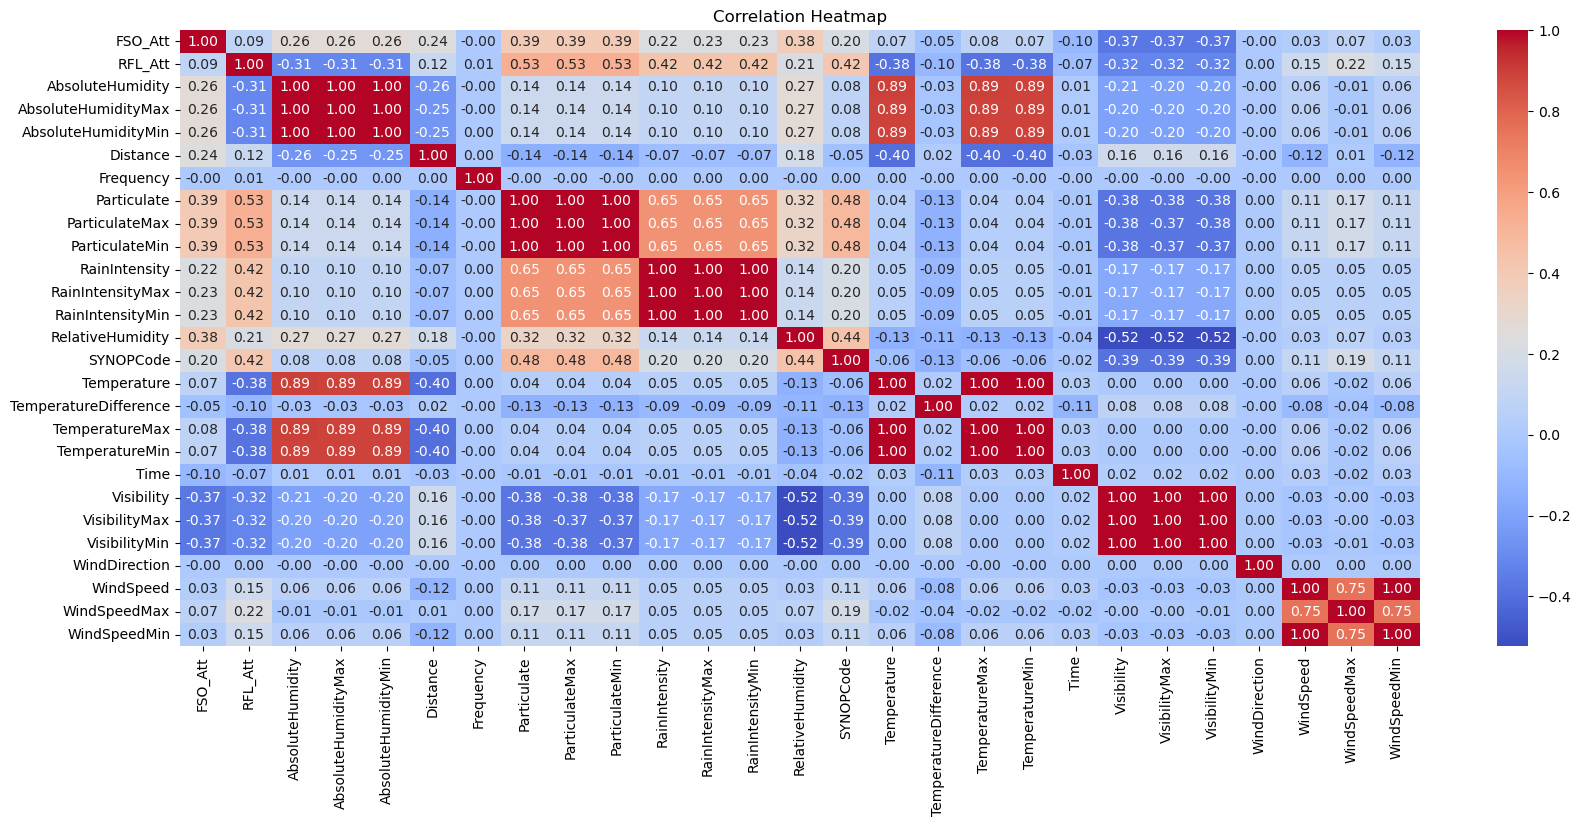

In [6]:
corr = data.corr()
plt.figure(figsize=(20, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

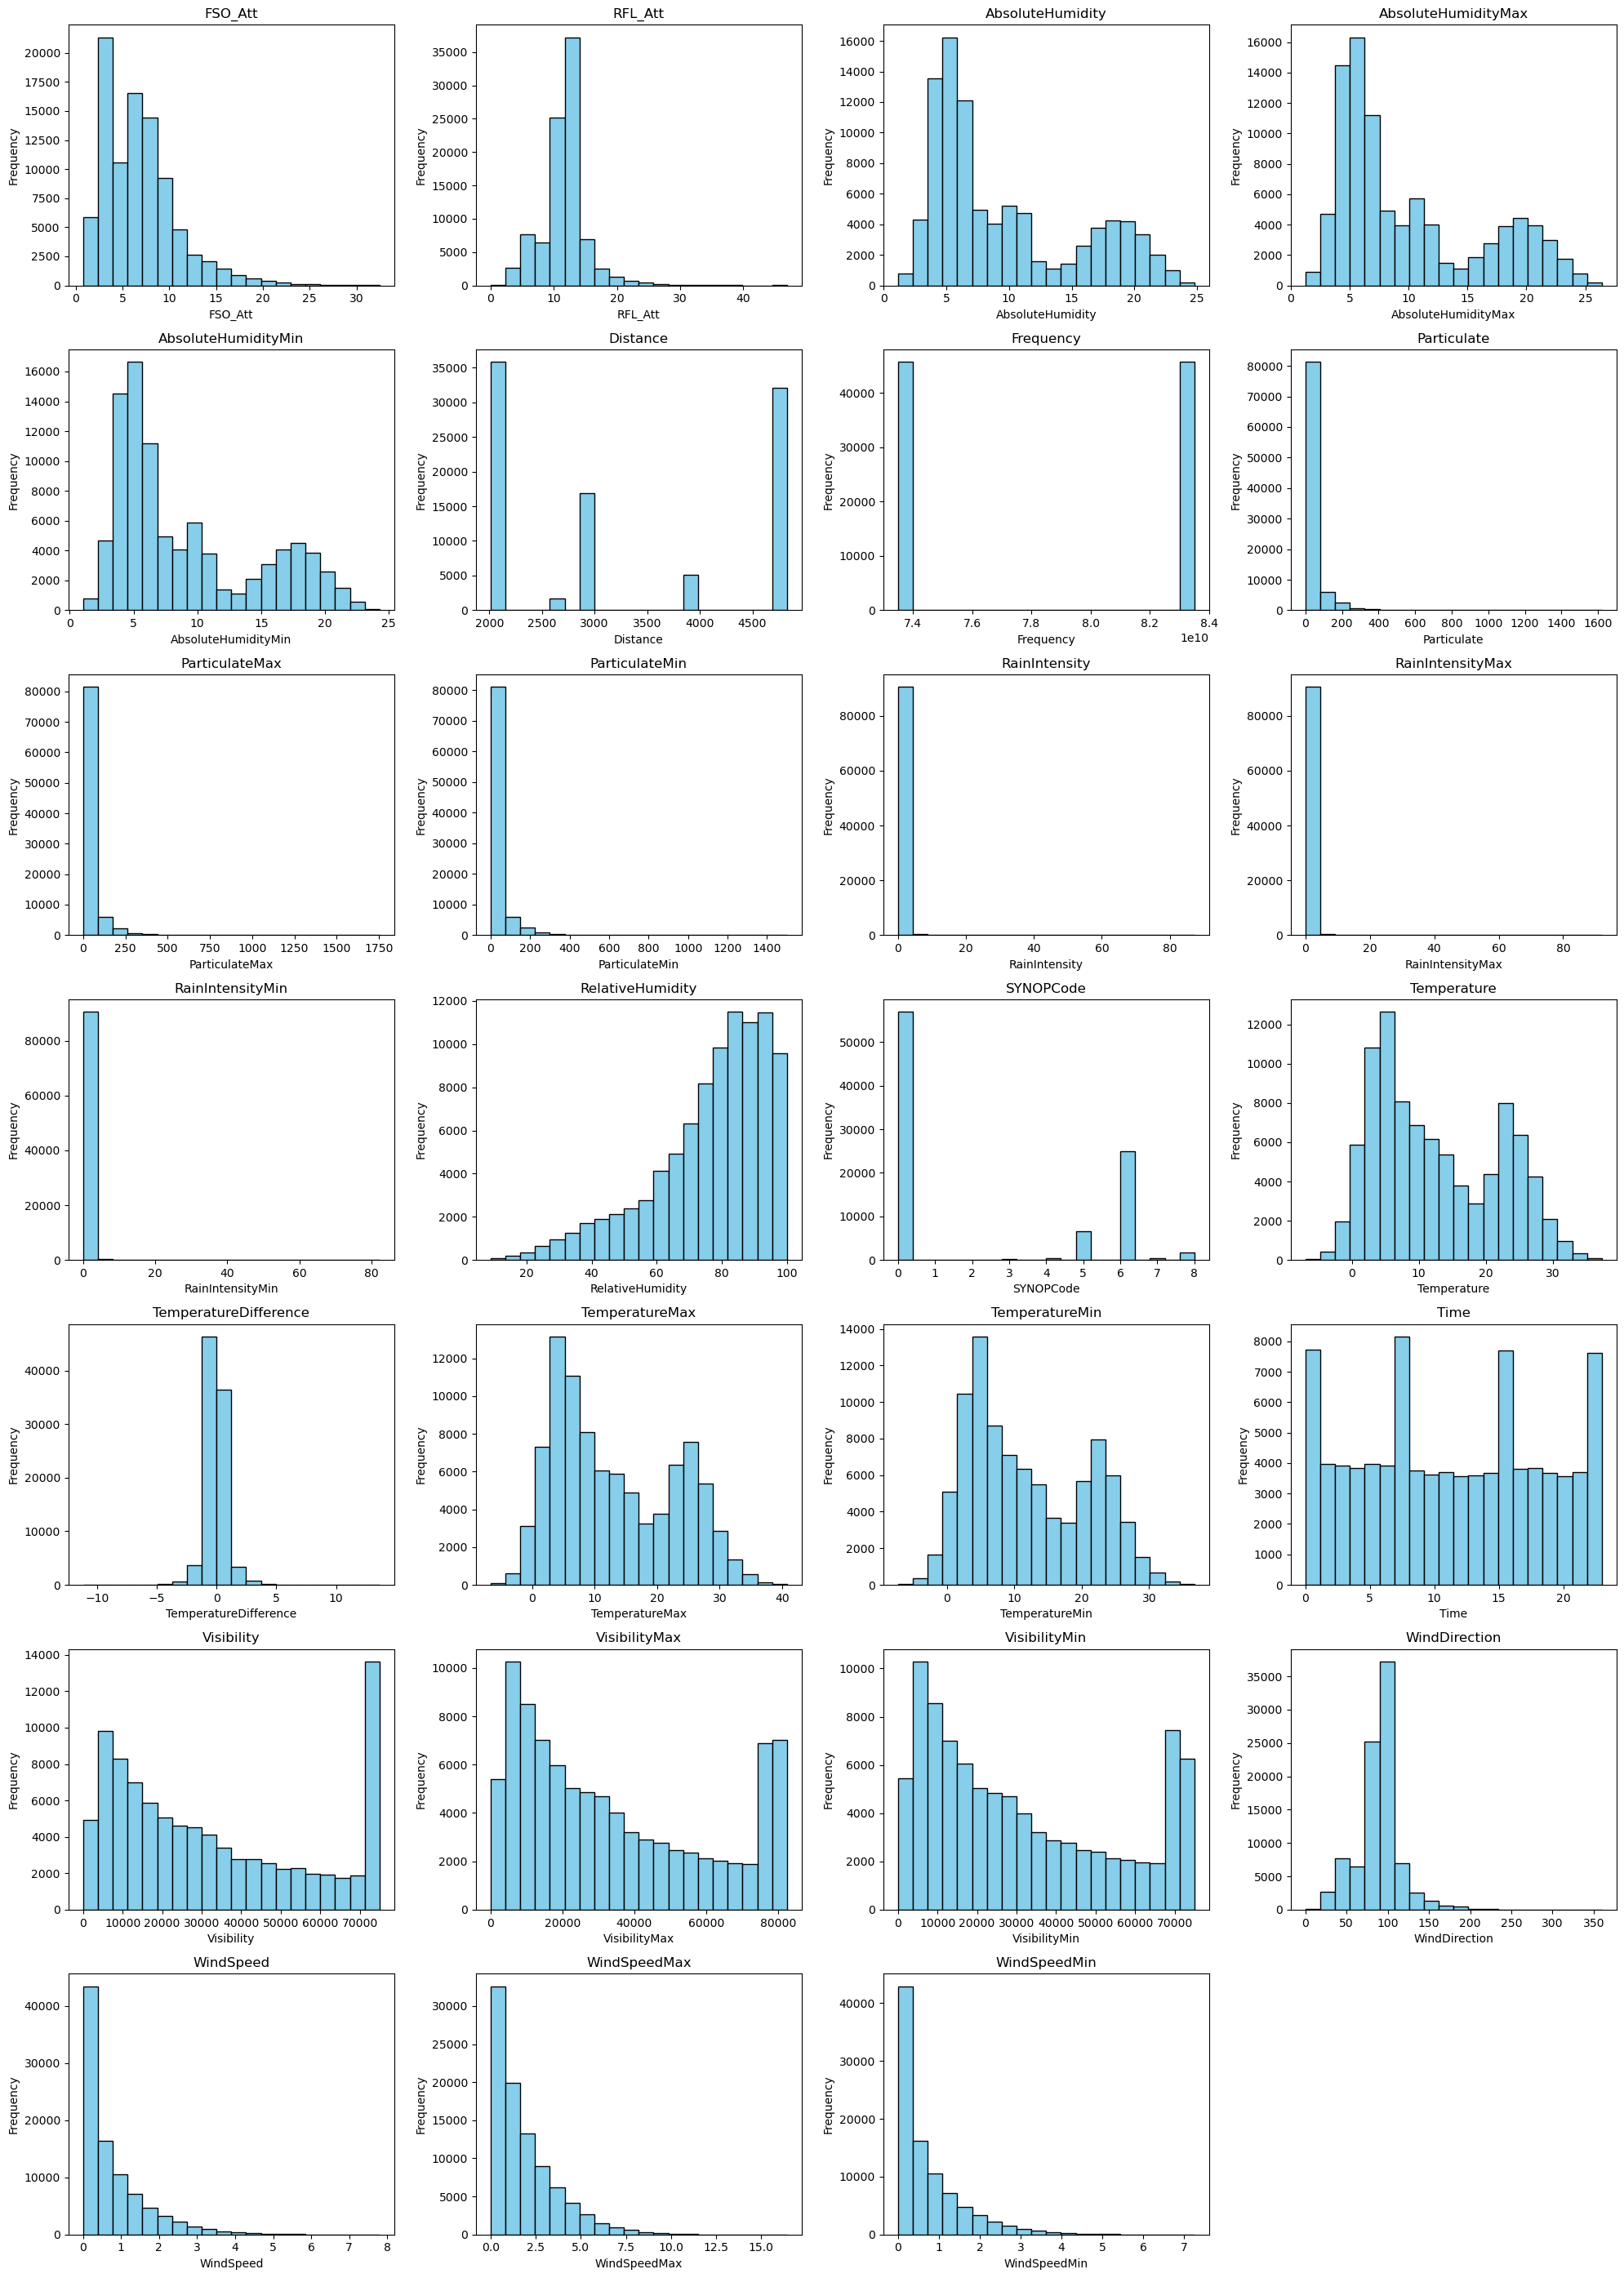

In [10]:
num_features = len(data.columns)
cols = 4 
rows = -(-num_features // cols) 

fig, axes = plt.subplots(rows, cols, figsize=(20, rows * 4))
axes = axes.flatten()  

for i, col in enumerate(data.columns):
    axes[i].hist(data[col], bins=20, color='skyblue', edgecolor='black')
    axes[i].set_title(col)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

for i in range(num_features, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

In [20]:
X = data.drop(columns=['FSO_Att', 'RFL_Att'])
y_fso = data['FSO_Att']
y_rfl = data['RFL_Att']

In [21]:
X_train, X_temp, y_fso_train, y_fso_temp = train_test_split(X, y_fso, test_size=0.3, random_state=42)
X_val, X_test, y_fso_val, y_fso_test = train_test_split(X_temp, y_fso_temp, test_size=0.5, random_state=42)

X_train_rfl, X_temp_rfl, y_rfl_train, y_rfl_temp = train_test_split(X, y_rfl, test_size=0.3, random_state=42)
X_val_rfl, X_test_rfl, y_rfl_val, y_rfl_test = train_test_split(X_temp_rfl, y_rfl_temp, test_size=0.5, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

X_train_scaled_rfl = scaler.fit_transform(X_train_rfl)
X_val_scaled_rfl = scaler.transform(X_val_rfl)
X_test_scaled_rfl = scaler.transform(X_test_rfl)


In [27]:
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest (n_estimators=100)": RandomForestRegressor(random_state=42),
    "Decision Tree (max_depth=5)": DecisionTreeRegressor(random_state=42)  
}

results = []

for model_name, model in models.items():
    model.fit(X_train_scaled, y_fso_train)
    y_val_pred = model.predict(X_val_scaled)
    y_test_pred = model.predict(X_test_scaled)
    rmse_val = np.sqrt(mean_squared_error(y_fso_val, y_val_pred))
    r2_val = r2_score(y_fso_val, y_val_pred)
    rmse_test = np.sqrt(mean_squared_error(y_fso_test, y_test_pred))
    r2_test = r2_score(y_fso_test, y_test_pred)
    results.append({
        "Model": model_name,
        "Validation RMSE": rmse_val,
        "Validation R²": r2_val,
        "Test RMSE": rmse_test,
        "Test R²": r2_test
    })

results_df = pd.DataFrame(results)
print(results_df)

                              Model  Validation RMSE  Validation R²  \
0                 Linear Regression         2.991670       0.405063   
1  Random Forest (n_estimators=100)         0.841912       0.952883   
2       Decision Tree (max_depth=5)         1.254123       0.895450   

   Test RMSE   Test R²  
0   2.987440  0.400548  
1   0.782502  0.958873  
2   1.195570  0.903992  


In [28]:
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest (n_estimators=100)": RandomForestRegressor(random_state=42),
    "Decision Tree (max_depth=5)": DecisionTreeRegressor(random_state=42)  
}

results = []

for model_name, model in models.items():
    model.fit(X_train_scaled_rfl, y_rfl_train)
    y_val_pred = model.predict(X_val_scaled_rfl)
    y_test_pred = model.predict(X_test_scaled_rfl)
    rmse_val = np.sqrt(mean_squared_error(y_fso_val, y_val_pred))
    r2_val = r2_score(y_fso_val, y_val_pred)
    rmse_test = np.sqrt(mean_squared_error(y_fso_test, y_test_pred))
    r2_test = r2_score(y_fso_test, y_test_pred)
    results.append({
        "Model": model_name,
        "Validation RMSE": rmse_val,
        "Validation R²": r2_val,
        "Test RMSE": rmse_test,
        "Test R²": r2_test
    })

results_df = pd.DataFrame(results)
print(results_df)

                              Model  Validation RMSE  Validation R²  \
0                 Linear Regression         6.335830      -1.668400   
1  Random Forest (n_estimators=100)         6.973596      -2.232640   
2       Decision Tree (max_depth=5)         7.000998      -2.258094   

   Test RMSE   Test R²  
0   6.343672 -1.702948  
1   6.949791 -2.244141  
2   6.975551 -2.268235  
